# Regresión Lineal

## PM10 Partículas en suspensión

In [1]:
# Paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_csv('../../datos/promedios_mensuales/PM10_mensual.csv')
df.head()

,fecha,noreste_pm10,suroeste_pm10,noroeste_pm10,sureste_pm10,centro_pm10
0,2005-01-31,76.771505,55.200269,56.841398,58.706989,60.142473
1,2005-02-28,71.745536,52.955357,53.136905,56.791667,56.491071
2,2005-03-31,66.627688,45.514785,46.938172,52.963710,51.978495
3,2005-04-30,73.201389,54.443056,58.904167,58.566667,59.301486
4,2005-05-31,69.212366,51.877688,56.430108,55.518817,57.013922


In [3]:
# Convirtiendo la fecha
import datetime as dt
df['fecha'] = pd.to_datetime(df['fecha'])
df['fecha'] = df['fecha'].map(dt.datetime.toordinal)

In [4]:
def obtener_regresion(X, y, zona, fecha_pred):
    print(f"\nRegresión Lineal para Partículas en suspensión en {zona}")
    # Dividiendo conjunto de entrenamiento y prueba
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    # Entrenando al modelo
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print(f"Score del Modelo: {lr.score(X_train, y_train)}")
    
    # Evaluando modelo de regresión lineal
    y_pred = lr.predict(X_test)
    
    print(" ### Resultados ###")
    print("Conjunto de prueba (test)")
    print(y_test)
    print("Predicción")
    print(y_pred)
    
    # Obteniendo predicción de la fecha ingresada
    fecha = fecha_pred
    fecha_pred = pd.to_datetime(fecha_pred)
    fecha_pred = dt.datetime.toordinal(fecha_pred)
    resultado = lr.predict([[fecha_pred]])
    
    # Visualizar los resultados de entrenamiento
    plt.scatter(X_train, y_train, color = "red")
    plt.plot(X_train, lr.predict(X_train), color = "blue")
    # Convirtiendo la fecha
    formatter = FuncFormatter(lambda x, pos: dt.datetime.strftime(dt.datetime.fromordinal(int(x)), '%Y'))
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.title("Contaminación de Partículas en suspensión en " + zona + " (Entrenamiento)")
    plt.xlabel("Fecha")
    plt.ylabel("Nivel de Contaminación")
    plt.show()
    
    print(f"La predicción para la fecha ingresada: {fecha} en la zona {zona} fue de {resultado}")

In [5]:
def obtener_prediccion(fecha_pred):
    X = df.iloc[:,0].values
    X = X.reshape(-1,1)
    zonas = ["Noreste", "Suroeste", "Noroeste", "Sureste", "Centro"]
    for i in range(1,6):
        obtener_regresion(X, df.iloc[:,i].values, zonas[i-1], fecha_pred)


Regresión Lineal para Partículas en suspensión en Noreste
Score del Modelo: 0.06591272946491056
 ### Resultados ###
Conjunto de prueba (test)
[56.375      76.99462366 64.0577957  72.6235119  73.34946237 93.57795699
 53.32392473 89.01440462 93.57886905 52.03629032 56.46944444 71.88306452
 90.60969532 87.50134409 81.19207868 97.62231183 76.08477011 59.63978495
 68.6438172  65.87231183 62.86944444 48.98924731 84.90456989 75.48790323
 84.72177419 69.39325918 70.49861111 72.91801075 64.80299923 55.28544791
 69.21236559 65.08870968 72.11021505 52.88888889 57.8561828  62.50134409
 89.07916667 81.10822561 45.31944444]
Predicción
[70.05821459 67.67710906 73.56469664 69.19788814 71.11624232 67.48158032
 63.97509827 73.16494899 72.37197133 63.2494694  63.11477182 71.97874131
 73.23229778 74.02527545 73.36482282 73.82974671 65.23082728 67.14918146
 71.91139252 70.85119225 66.48872884 75.15282451 71.77886749 74.82042565
 75.41787457 72.83689522 66.94930764 66.75595145 73.42999906 64.96794976
 63.0

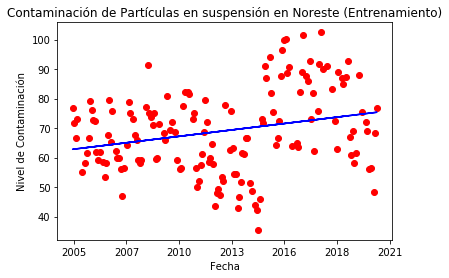

La predicción para la fecha ingresada: 2022-01-01 en la zona Noreste fue de [76.21302478]

Regresión Lineal para Partículas en suspensión en Suroeste
Score del Modelo: 0.041407714196559864
 ### Resultados ###
Conjunto de prueba (test)
[39.27822581 45.85483871 35.71236559 44.49702381 47.80510753 53.02016129
 30.07795699 51.71875    50.00892857 31.55376344 38.27638889 36.07123656
 49.68682796 47.8204518  43.82526882 53.16263441 44.31178161 26.2983871
 33.97043011 41.59946237 26.55       31.04811082 44.85215054 47.40994624
 44.38709677 39.73472222 32.66666667 32.36620157 35.81944444 31.5766129
 51.87768817 28.84284363 48.10887097 28.44166667 28.96044014 38.28897849
 45.41527778 40.48387097 30.97638889]
Predicción
[40.65614592 39.52260239 42.32543357 40.24658093 41.15982813 39.42951944
 37.7602318  42.13513064 41.75762755 37.41479061 37.3506668  41.57042738
 42.16719254 42.54469564 42.2302821  42.45161268 38.35803121 39.27127842
 41.53836548 41.03364901 38.95686488 43.081474   41.47527592 

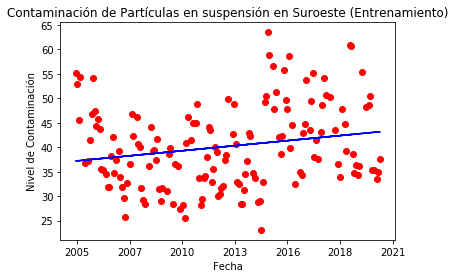

La predicción para la fecha ingresada: 2022-01-01 en la zona Suroeste fue de [43.58619047]

Regresión Lineal para Partículas en suspensión en Noroeste
Score del Modelo: 0.3108132365546442
 ### Resultados ###
Conjunto de prueba (test)
[50.87231183 59.72983871 53.13306452 66.57738095 64.29166667 66.93145161
 36.56989247 74.91815476 81.80208333 39.50268817 46.31944444 62.76478495
 75.17607527 72.24524345 66.80107527 80.59274194 53.24856322 37.45295699
 60.04301075 67.96908602 35.75277778 45.88844086 74.30107527 70.62365591
 73.27150538 64.2298229  46.14166667 47.57526882 51.81805556 40.12634409
 56.43010753 39.25268817 64.00268817 35.48566836 39.74596774 45.68145161
 70.66884885 65.00403226 42.0125    ]
Predicción
[57.91261799 52.62484373 65.69954104 56.00207181 60.26220382 52.19062869
 44.40370563 64.81181252 63.0508293  42.79228537 42.49315946 62.17757461
 64.96137547 66.72235869 65.25567678 66.28814365 47.19233111 51.45246312
 62.02801165 59.67360121 49.9857812  69.22633209 61.73371034

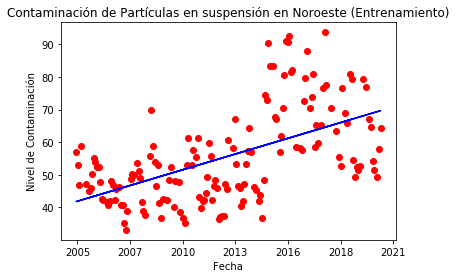

La predicción para la fecha ingresada: 2022-01-01 en la zona Noroeste fue de [71.58074253]

Regresión Lineal para Partículas en suspensión en Sureste
Score del Modelo: 0.22942018362176483
 ### Resultados ###
Conjunto de prueba (test)
[49.84139785 56.67352975 47.49327957 58.67113095 62.26747312 69.54973118
 34.82275143 73.10976983 74.98337517 38.31442974 42.9375     52.25537634
 62.58875798 72.18187956 59.53062669 77.46093512 52.02011494 34.64784946
 54.04973118 53.38306452 32.7540774  42.13966844 64.82392473 65.58702005
 66.12365591 56.91497474 41.64305556 38.94489247 45.61822792 40.26747312
 55.5188172  35.61424731 52.86827957 32.06111111 34.64919355 42.81989247
 64.59284796 56.47989497 38.52364018]
Predicción
[53.47518926 49.37065447 59.51964104 51.99216391 55.29901083 49.03360325
 42.98915147 58.83055855 57.46362863 41.73831697 41.50612613 56.78578119
 58.94665397 60.3135839  59.1750998  59.97653268 45.15376927 48.46061619
 56.66968577 54.84211918 47.32213209 62.2572459  56.44123995

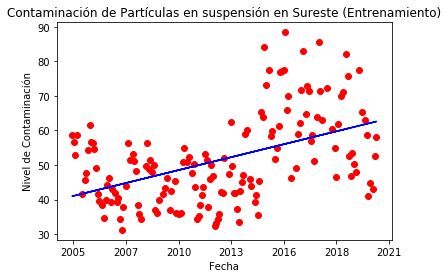

La predicción para la fecha ingresada: 2022-01-01 en la zona Sureste fue de [64.08481249]

Regresión Lineal para Partículas en suspensión en Centro
Score del Modelo: 0.1389257201804186
 ### Resultados ###
Conjunto de prueba (test)
[47.89784946 64.20564516 49.6061828  53.95238095 61.19354839 68.50806452
 41.41812944 71.3125     71.41815476 40.37132615 44.11098379 56.34005376
 72.53225806 64.47311828 61.13037634 80.34677419 63.47557471 31.86424731
 51.33870968 54.83602151 33.46388889 36.61290323 67.60080645 53.8266129
 65.17069892 55.3375     38.13333333 37.72715054 47.30694444 47.36336693
 57.01392248 36.45026882 54.02956989 35.93888889 41.35080645 47.36844982
 63.85416667 59.04032258 38.68194444]
Predicción
[54.18163459 51.15800085 58.63432151 53.08915379 55.52516528 50.90970976
 46.45702284 58.12670417 57.11974585 45.53558701 45.36454203 56.62040488
 58.21222665 59.21918497 58.38051284 58.97089388 48.05160341 50.4876149
 56.53488239 55.18859291 49.64894277 60.65099694 56.3665962  60.2

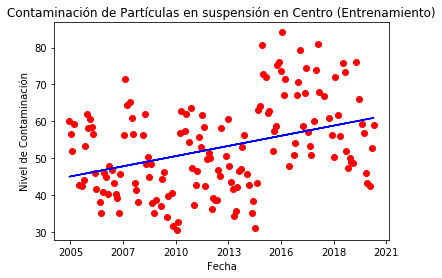

La predicción para la fecha ingresada: 2022-01-01 en la zona Centro fue de [61.99728641]


In [6]:
obtener_prediccion('2022-01-01')